In [46]:
%load_ext autoreload
%autoreload 2
from src.experiments.training_experiments import run_batched_DOE_with_features
import pandas as pd
from matplotlib import pyplot as plt

#manual seed torch and numpy
import torch
import numpy as np

seed = 1337
torch.manual_seed(seed)
np.random.seed(seed)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
results = run_batched_DOE_with_features()

In [48]:
# First, let's flatten the structure
flattened_data = []
for sparsity, value_list in results.items():
    for item in value_list:
        # Create a row by combining the sparsity with the inner dictionary
        row = {'sparsity': sparsity}
        row.update({
            'mse': float(item['mse']), 
            'L0': float(item['L0']),
            'L1 lambda': item['L1 lambda'],
            'weights': item['weights'],
            'biases': item['biases'],
            'features': item['features']
        })
        flattened_data.append(row)

# Create DataFrame
df = pd.DataFrame(flattened_data)

In [49]:
df

,sparsity,mse,L0,L1 lambda,weights,biases,features
0,5,0.018839,36.297590,0.00002,"[[1.4366302e-14, 2.6907984e-15, -3.0088377e-17...","[-0.0052611567, 0.011742948, -0.007225899, 0.0...","[[-0.06266938682043928, -0.04369489411120658, ..."
1,5,0.029920,16.254289,0.00003,"[[-5.288374e-39, 3.704756e-39, -9.07653e-39, 4...","[-0.065562144, 0.013820122, 0.046736285, 0.100...","[[-0.06266938682043928, -0.04369489411120658, ..."
2,5,0.042775,2.266927,0.00004,"[[-6.800817e-39, -6.72601e-39, -1.162283e-39, ...","[-0.022330368, 0.011102884, 0.026653107, 0.023...","[[-0.06266938682043928, -0.04369489411120658, ..."
3,5,0.045110,0.000000,0.00005,"[[-1.237768e-39, 5.3103287e-38, -4.878762e-39,...","[-0.0014554516, 0.0029146937, 0.011235686, 0.0...","[[-0.06266938682043928, -0.04369489411120658, ..."
4,5,0.045109,0.000000,0.00006,"[[8.321455e-39, -0.45031843, 7.484823e-37, -1....","[-0.0031479262, 0.0021013876, 0.013210244, 0.0...","[[-0.06266938682043928, -0.04369489411120658, ..."
5,10,0.027388,58.421722,0.00002,"[[-5.6733035e-34, -1.4646817e-33, -9.251203e-3...","[0.0033790085, -0.011114333, 0.04271076, 0.034...","[[-0.15461326813504458, -0.05036664725480139, ..."
6,10,0.036662,33.560226,0.00003,"[[-2.972894e-39, 3.574525e-39, 4.415978e-39, -...","[-0.0021604435, -0.040758375, 0.05871179, 0.04...","[[-0.15461326813504458, -0.05036664725480139, ..."
7,10,0.049938,20.698172,0.00004,"[[-2.422143e-39, 5.234343e-39, -2.715529e-39, ...","[0.00045370217, -0.06301527, -0.0058265505, 0....","[[-0.15461326813504458, -0.05036664725480139, ..."
8,10,0.064496,12.151858,0.00005,"[[4.976577e-39, 3.086378e-39, 6.977193e-39, 5....","[-0.019365368, -0.052119605, 0.044005264, 0.01...","[[-0.15461326813504458, -0.05036664725480139, ..."
9,10,0.080106,4.350541,0.00006,"[[7.126462e-39, 0.012464139, 2.4153697e-38, 2....","[0.04597536, -0.017608933, 0.069348484, 0.0261...","[[-0.15461326813504458, -0.05036664725480139, ..."


Average cosine similarity of matched features: 0.2026


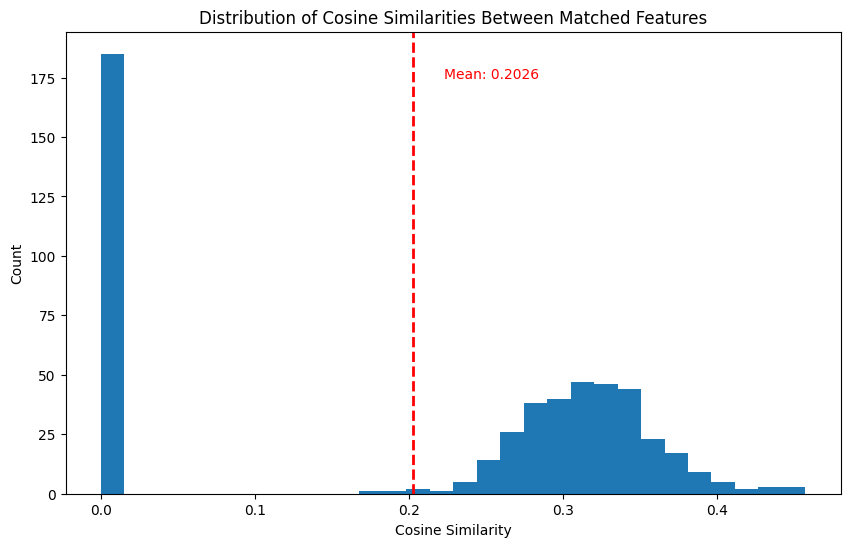

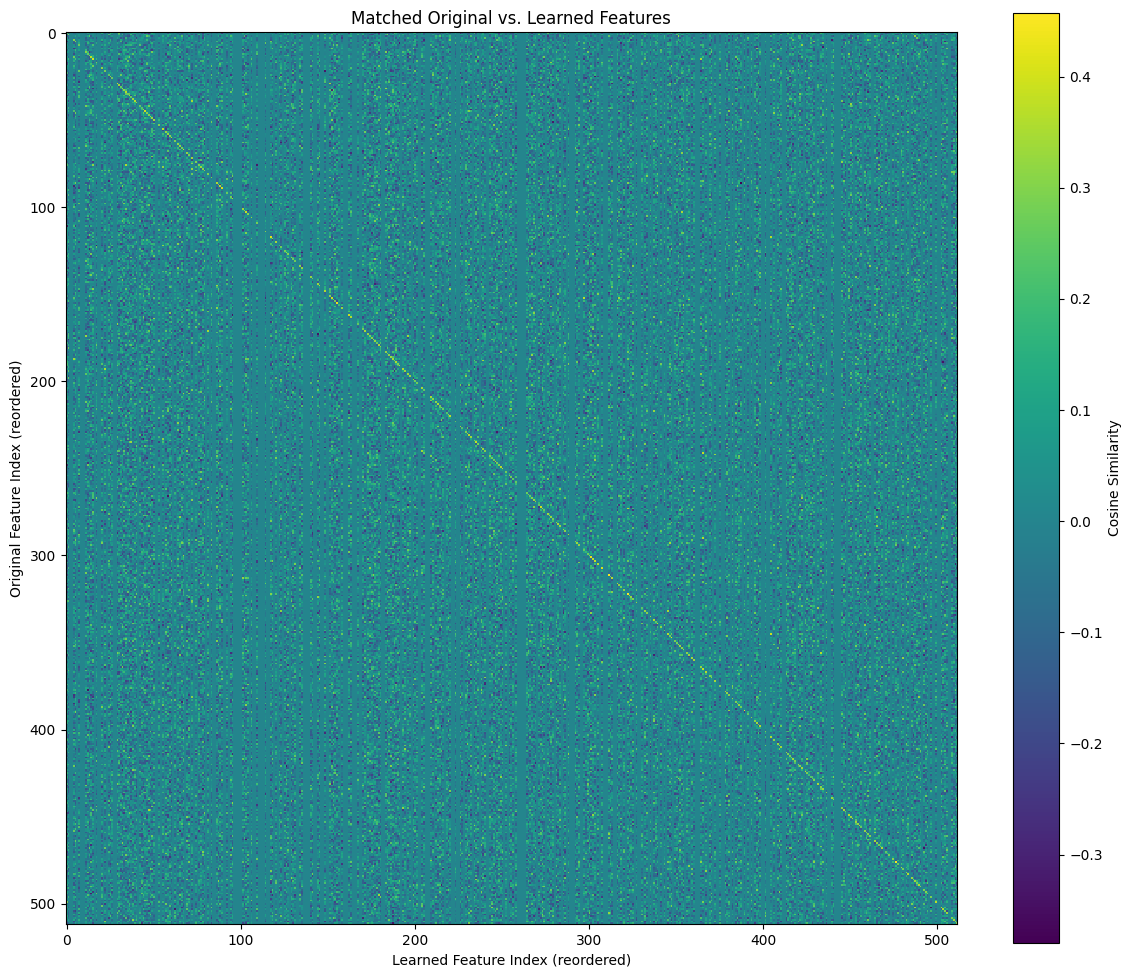

In [54]:
# Starting with:
features = df['features'].iloc[27]  # Original features - shape 512 x 128
weights = df['weights'].iloc[27]    # Learned weights (W_out) - shape 512 x 128

# Compute cosine similarity matrix between original features and learned weights
import numpy as np
from scipy.spatial.distance import cosine

def cosine_similarity(vec1, vec2):
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0
    return np.dot(vec1, vec2) / (norm1 * norm2)

n_features = features.shape[0]  # Should be 512
similarity_matrix = np.zeros((n_features, n_features))

for i in range(n_features):
    for j in range(n_features):
        # Compare original feature i with learned weight row j
        similarity_matrix[i, j] = cosine_similarity(features[i], weights[j])

# Find optimal matching using the Hungarian algorithm
from scipy.optimize import linear_sum_assignment

row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
matches = list(zip(row_ind, col_ind))
match_similarities = [similarity_matrix[i, j] for i, j in matches]
average_similarity = np.mean(match_similarities)

print(f"Average cosine similarity of matched features: {average_similarity:.4f}")

# Visualize the results
import matplotlib.pyplot as plt

# Distribution of similarities
plt.figure(figsize=(10, 6))
plt.hist(match_similarities, bins=30)
plt.title("Distribution of Cosine Similarities Between Matched Features")
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.axvline(average_similarity, color='red', linestyle='dashed', linewidth=2)
plt.text(average_similarity+0.02, plt.ylim()[1]*0.9, f'Mean: {average_similarity:.4f}', 
         color='red')
plt.show()

# Visualize the matching with a heatmap of the reordered similarity matrix
plt.figure(figsize=(12, 10))
reordered_matrix = similarity_matrix[row_ind, :][:, col_ind]
plt.imshow(reordered_matrix, cmap='viridis', interpolation='none')
plt.colorbar(label='Cosine Similarity')
plt.title('Matched Original vs. Learned Features')
plt.xlabel('Learned Feature Index (reordered)')
plt.ylabel('Original Feature Index (reordered)')
plt.tight_layout()
plt.show()

In [51]:
vecs = np.ones((2,100))
vec1 = vecs[0,:]
vec2 = vecs[1,:]

vec1[0] = 0

#normalize
vec1 = vec1/np.linalg.norm(vec1)
vec2 = vec2/np.linalg.norm(vec2)

#dot product
dot_product = np.dot(vec1, vec2)

print(dot_product)



0.9949874371066197


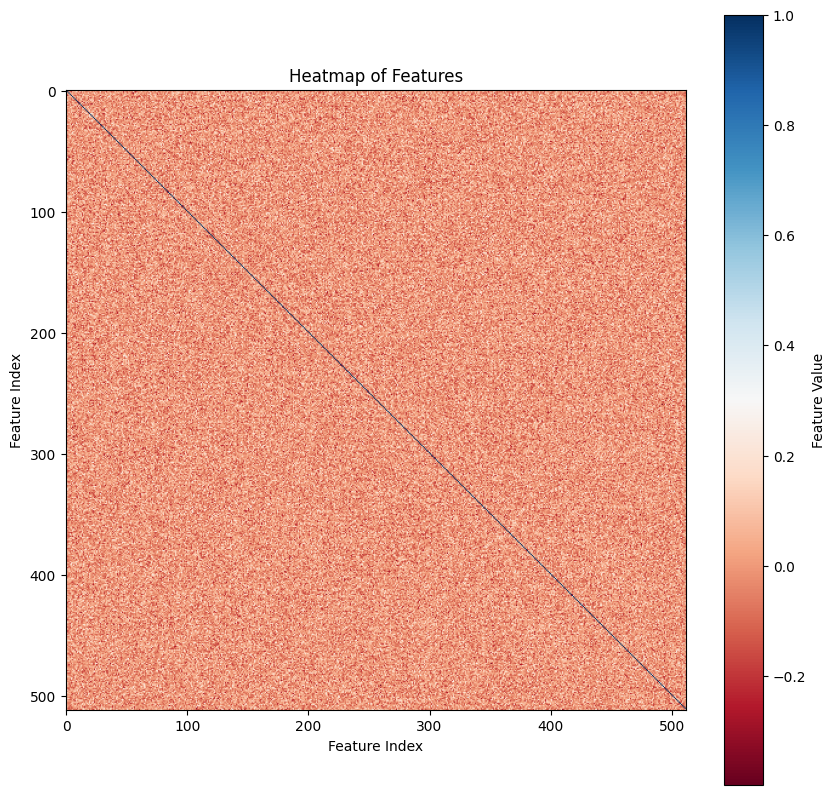

In [52]:
#heatmap of features big plot
plt.figure(figsize=(10, 10))
plt.imshow(features @ features.T, cmap='RdBu')
plt.colorbar(label='Feature Value')
plt.title('Heatmap of Features')
plt.xlabel('Feature Index')
plt.ylabel('Feature Index')
plt.show()

In [53]:
#norm of the weight rows
weight_norms = np.linalg.norm(weights, axis=1)
features_norms = np.linalg.norm(features, axis=1)

print(weight_norms)

[3.59118457e-10 9.64189579e-12 5.79118868e-03 6.36188088e-06
 7.95159424e-12 1.43373029e-08 3.14681614e-08 2.20207641e-12
 5.16369614e-09 6.05797079e-11 2.17646595e-11 1.48559178e-04
 3.52577771e-08 5.80314907e-10 2.95147356e-06 4.95256067e-08
 3.30945849e-09 4.52996182e-11 8.60618093e-06 2.26228203e-10
 1.32624054e-08 1.79202639e-10 4.80720459e-08 4.60244516e-11
 1.20716222e-05 2.19526290e-11 8.61655790e-05 2.88804944e-08
 1.00376997e-06 1.40647899e-06 1.69932957e-08 1.53101428e-05
 8.42908232e-09 8.49350879e-04 1.32859009e-06 3.55646554e-11
 2.12368213e-11 4.76358753e-13 1.42225370e-10 3.43576865e-13
 7.15779924e-09 6.05165005e-05 1.38618428e-09 2.48204825e-11
 1.05755277e-07 7.49638929e-08 4.85896479e-12 2.60528754e-08
 3.57847640e-10 9.93036764e-11 1.52239221e-09 9.89611149e-09
 1.52659663e-09 2.51178078e-10 4.06002315e-12 6.68690916e-08
 4.34261089e-08 1.87947575e-04 1.15377008e-09 5.78050496e-09
 9.14355169e-08 1.18570483e-06 8.70923000e-10 2.74752153e-07
 2.22611928e+00 2.313198